<a href="https://colab.research.google.com/github/The237/DeepLearningCourses/blob/main/04_CNNs_pour_la_classification_d'Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f"User uploaded file {fn} with length {len(uploaded[fn])} bytes")

Saving salon.png to salon (1).png
User uploaded file salon (1).png with length 239437 bytes


In [9]:
import matplotlib.pyplot as plt

In [15]:
import cv2
import numpy as np

def processImage(image):
  image = cv2.imread(image)
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
  return image


def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [16]:
image = processImage("salon.png")

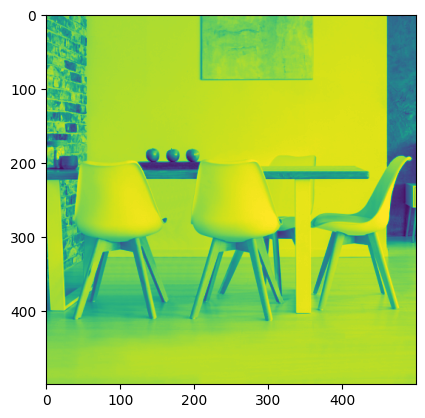

In [17]:
plt.imshow(image)
plt.show()

In [19]:
filtre = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

In [20]:
output = convolve2D(image, filtre, padding = 2)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 169. ... 105.   0.   0.]
 ...
 [  0.   0. 216. ... 220.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [24]:
cv2.imwrite("salon_horizontal.png",output)

True

In [34]:
filtre = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

In [35]:
output = convolve2D(image, filtre, padding = 2)
cv2.imwrite("salon_vertical.png",output)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 169. ... 105.   0.   0.]
 ...
 [  0.   0. 216. ... 220.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


True

# Test de la convolution sur Fashion MNIST

In [37]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Ici on extrait d'abord des caractéristiques remarquables sur les images à travers les filtres de convolution, avant d'applatir les images comme dans la première méthode.

In [38]:
training_images = training_images/255.0
test_images = test_images/255.0

In [39]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [40]:
training_images.shape

(60000, 28, 28)

On doit reshape l'image afin d'avoir la même structure d'empilement des couches que dans le cas des images couleurs, pour lesquelles on a 3 couches de pixels (RGB) empilées les unes sur les autres.

In [44]:
training_images = training_images.reshape((60_000, 28, 28, 1))
test_images = test_images.reshape((10_000, 28, 28, 1))

In [46]:
training_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Modeling

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D

In [ ]:
model = Sequential([
    # partie CNN du modèle
    Conv2D(filters = 64, kernel_size = (3,3), padding = "valid", activation = "relu", input_shape = (28,28,1)),




    Dense(units = 784, activation = "sigmoid"),
    Dense(units = 10, activation = "softmax")
  ]
)